<a href="https://colab.research.google.com/github/antahiap/dsr-b35/blob/main/07_pycaret_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 86.1 MB/s eta 0:0

### Trying Multiple Time Series Forecasting Models with PyCaret

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment time and makes you more productive.

It's a great first choice in order to do exploratory analysis on a time series and to benchmark different models.

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv", delimiter=",")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Convert the 'Month' column to datetime format and set it as the index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Show the DataFrame with the new datetime index
data.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


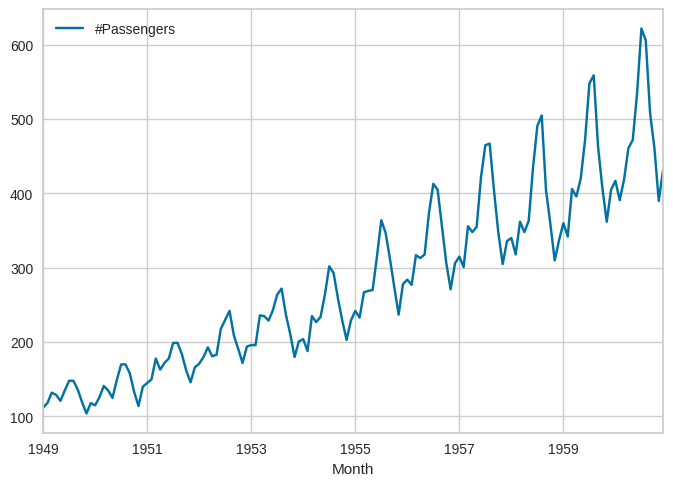

In [ ]:
data.plot();

In [ ]:
from pycaret.time_series import *
s = setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Target,#Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(143, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## `session_id`

`session_id`: A pseudo-random number seed for reproducibility across multiple function calls.
### Why use session_id?
* Reproducibility: The session_id ensures that all the random partitions or random initializations are reproducible. In machine learning, many algorithms use randomness. By setting the session_id, you ensure that you get the same randomness each time you run the code, making your experiments reproducible.

* Consistency: If you're working in a team or even if you're just working on a project over a span of time, having a session_id allows you to have a consistent reference. This can be beneficial when you are comparing models, doing parameter tuning, etc.

* Debugging and Sharing: If you encounter an issue and you want to share it with others (either for help or for demonstrating the issue), setting a session_id allows others to see exactly the same results as you, making it easier to diagnose issues or collaborate.

## Exogenous variables

### What Are Exogenous Variables?

In the context of time series analysis, exogenous variables are external factors or variables that are not part of the time series data but can influence the variable you are trying to forecast. These variables are considered independent and are not predicted by the model but are used to improve the predictive performance of the model.

For example, consider you are trying to forecast the sales of ice cream. The sales data over time would be your endogenous variable (the variable you are trying to predict). Weather conditions like temperature could serve as exogenous variables, as they are external to your sales data but highly likely to influence ice cream sales.

### Mathematical Representation

In a univariate time series model like ARIMA (AutoRegressive Integrated Moving Average), the equation can be represented as:

$$
Y_t = f(Y_{t-1}, Y_{t-2}, \ldots) + \epsilon_t
$$

Here, \( Y_t $ is predicted solely based on its own past values.

In a model with exogenous variables, the equation might look something like:

$$
Y_t = f(Y_{t-1}, Y_{t-2}, \ldots, X_{1t}, X_{2t}, \ldots) + \epsilon_t
$$

Here, $ Y_t $ is predicted based on its own past values as well as the current (or past) values of one or more exogenous variables \( X_1, X_2, \ldots $.

### Why Are Exogenous Variables Not Present in the `airPassengers.csv` File?

The `airPassengers.csv` file likely contains only the time series data of air passenger counts, making it a univariate time series dataset. Exogenous variables like economic indicators, holidays, or fuel prices that could potentially affect the number of air passengers are not included in this dataset.

In simpler terms, the dataset is focused only on the endogenous variable (air passenger counts) and does not include any additional variables that could serve as exogenous variables to improve the predictive model.

To include exogenous variables, one would need to collect relevant external data and merge it with the existing time series data for comprehensive analysis and improved forecasting.

## FoldGenerator: ExpandingWindowSplitter

In time series analysis, cross-validation is a bit different than in other types of machine learning tasks because of the temporal nature of the data. One common approach for cross-validation in time series is to use an "expanding window" strategy, and this is where `ExpandingWindowSplitter` comes in.



Cross-validation is a well-established methodology for choosing the best model by tuning hyper-parameters or performing feature selection. For time series data, the traditional cross-validation methods such as k-fold cross-validation are not applicable due to the temporal nature of the data [Source 2](https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/), [Source 3](https://medium.com/@pradip.samuel/cross-validation-in-time-series-model-b07fbba65db7).

The ExpandingWindowSplitter or the 'walk-forward' approach is a method of cross-validation specifically designed for time series data. In this approach, the model is trained on a 'window' of data, and the model's performance is validated on the following data points. The window of data is then 'expanded' to include these data points, and the process is repeated. This approach respects the temporal order of the data and prevents the model from learning from future data when predicting past events [Source 5](https://medium.com/eatpredlove/time-series-cross-validation-a-walk-forward-approach-in-python-8534dd1db51a).

Here is a Python code snippet implementing the ExpandingWindowSplitter:

```python
from sklearn.model_selection import TimeSeriesSplit

# Initialize TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Iterate over each split
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    score = model.score(X_test, y_test)
    print("Score: {0:.3f}".format(score))
```

This code initializes a TimeSeriesSplit object with 5 splits. It then iterates over each split, training the model on the training data and evaluating it on the test data [Source 2](https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/).

The ExpandingWindowSplitter approach is especially useful in time series forecasting where the model's performance needs to be evaluated on future data. It also allows the model to learn from more data as the window expands, potentially improving the model's performance [Source 5](https://medium.com/eatpredlove/time-series-cross-validation-a-walk-forward-approach-in-python-8534dd1db51a).

#### What is ExpandingWindowSplitter?

`ExpandingWindowSplitter` is a class provided in some machine learning libraries designed to perform time series cross-validation. In this method, the training set starts with a minimum number of observations and gradually expands by including more recent observations in each fold, while the test set remains fixed in size.

#### How Does It Work?

Imagine you have a time series dataset with \( T \) observations. The expanding window method works as follows:

1. **Initialization**: Decide on a minimum number \( t \) of observations to start the training set and a fixed size \( h \) for the test set.
2. **First Fold**: Train the model on the first \( t \) observations and validate it on the next \( h \) observations.
3. **Second Fold**: Train the model on the first \( t + h \) observations and validate it on the next \( h \) observations.
4. **Continue**: Keep adding the next \( h \) observations to the training set for each subsequent fold and validate it on the next \( h \) observations.

This way, the training set gradually expands to include more data, but the test set remains the same size.

#### Mathematical Representation

In the $ k^{th} $ fold, the model is trained on $ t + (k - 1) \times h $ observations and validated on the next $ h $ observations.

#### Why Use ExpandingWindowSplitter?

1. **Temporal Consistency**: The method respects the temporal order of observations, making it suitable for time series data where temporal dynamics are important.
2. **Increasing Training Data**: As the folds progress, the model trains on an increasing amount of data, which can potentially improve the model's performance on later folds.
3. **Fixed-Size Test Set**: Having a fixed-size test set can make it easier to compare model performance across folds.

In summary, `ExpandingWindowSplitter` is a useful tool for performing time series cross-validation in a way that respects the unique characteristics and challenges of time series data.

In [ ]:
≠check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


In [ ]:
plot_model(plot = 'decomp_classical')

In [ ]:
plot_model(plot = 'diagnostics')

In [ ]:
plot_model(plot = 'acf')

In [ ]:
plot_model(plot = 'pacf')

In [ ]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
ets,ETS,0.2426,0.2136,7.7515,7.7515,0.0172,0.0174,0.3300
exp_smooth,Exponential Smoothing,0.2435,0.2144,7.7809,7.7809,0.0172,0.0175,1.8533
stlf,STLF,0.2793,0.2460,8.9481,8.9481,0.0217,0.0213,0.0867
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.3408,0.3002,10.9141,10.9141,0.0261,0.0258,0.1500
arima,ARIMA,0.3620,0.3189,11.5951,11.5951,0.0278,0.0274,0.4567
auto_arima,Auto ARIMA,0.4086,0.3598,13.0790,13.0790,0.0309,0.0304,14.8100
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.4540,0.3997,14.5308,14.5308,0.0344,0.0337,0.6767
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.4713,0.4149,15.0691,15.0691,0.0345,0.0342,0.5333
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.4924,0.4334,15.7312,15.7312,0.0350,0.0350,0.2067
theta,Theta Forecaster,0.5020,0.4418,16.0228,16.0228,0.0346,0.0344,0.0667


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
best

AutoETS(seasonal='mul', sp=12, trend='add')

In [ ]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh': 24})

In [ ]:
plot_model(best, plot = 'residuals')

In [ ]:
plot_model(best, plot = 'insample')

In [ ]:
final_best = finalize_model(best)

In [ ]:
save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 AutoETS(seasonal='mul',
                                                                                                                                         sp=12,
                                                                                                                                         trend='add'))]))]))]))]),
 'my_best_model.pkl')

In [ ]:
loaded_model = load_model('my_best_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
predict_model(loaded_model, fh = 48)

,y_pred
1961-01,445.4229
1961-02,418.3921
1961-03,464.7036
1961-04,494.5817
1961-05,505.5179
1961-06,573.3778
1961-07,663.6585
1961-08,654.8065
1961-09,546.7023
1961-10,488.2774


## References

* [Time series forecasting with PyCaret](https://www.datacamp.com/tutorial/tutorial-time-series-forecasting)